<small><i>March 2019 - This notebook was created by [Santi Seguí](www.cvc.uab.es/people/ssegui/). Source and license info are in the folder.</i></small>

### Data Visualization with Python
![](https://www.anaconda.com/wp-content/uploads/2019/01/PythonVisLandscape.jpg)

image from: https://www.anaconda.com/wp-content/uploads/2019/01/PythonVisLandscape.jpg

#### Matplotlib

The easiest way to interact with matplotlib is via pylab in iPython. By starting iPython (or iPython notebook) in "pylab mode", both matplotlib and numpy are pre-loaded into the iPython session:

ipython notebook --pylab
You can specify a custom graphical backend (e.g. qt, gtk, osx), but iPython generally does a good job of auto-selecting. Now matplotlib is ready to go, and you can access the matplotlib API via plt. If you do not start iPython in pylab mode, you can do this manually with the following convention:

import matplotlib.pyplot as plt

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
from scipy import stats
import pandas as pd
import seaborn as sns # pip install seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.set_style("whitegrid")

<b>Data to play</b>

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
#Let see how Titanic data looks like
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Some question we would like to visualize?
* Age distribution
* Age distribution on death vs. survived
* Number of deads/surviveds per class
* Were the chances of surviving the same in all classes?

### Data Distribution: 1 Single Variable with  <b>Column Histogram</b>

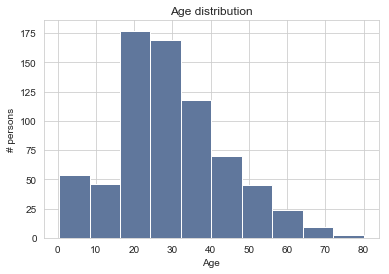

In [4]:
data=pd.Series(titanic.age.values).dropna()
plt.hist(data);
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("# persons")
plt.show()

By default histograms are plotted with 10 bins of equal size. The more bins we have the more sensitive is the plot to high-frequency patterns in the distribution.

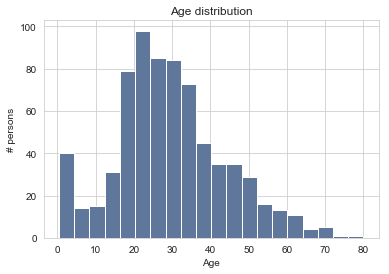

In [4]:
data=pd.Series(titanic.age.values).dropna()
plt.hist(data, bins = 20);
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("# persons")
plt.show()

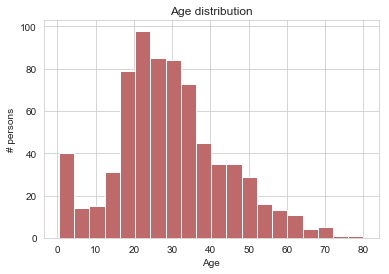

In [5]:
plt.hist(data, 20, color=sns.desaturate("indianred", .75), histtype='barstacked');
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("# persons")
plt.show()

### Data Distribution: 1 Single Variable with <b> Boxplot </b>

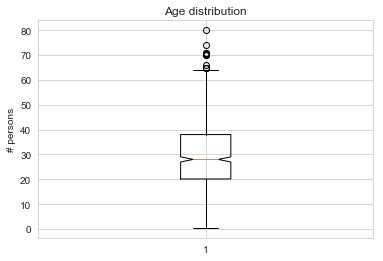

In [7]:
plt.boxplot(data, 1)
plt.title("Age distribution")
plt.ylabel("# persons")
plt.show()

1 Single Variable / 2 Distributions : <b>Stacked Column Histogram</b>

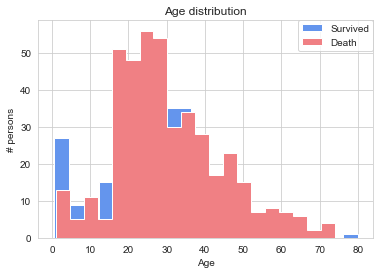

In [8]:
data1=pd.Series(titanic[titanic.alive=="yes"].age.values).dropna()
plt.hist(data1, bins=20, color="#6495ED",histtype='stepfilled', label='Survived');
data2=pd.Series(titanic[titanic.alive=="no"].age.values).dropna()
plt.hist(data2, bins=20, color="#F08084",histtype='stepfilled',label='Death');
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("# persons")
plt.legend(loc='best', borderaxespad=0.)
plt.show()

The <b>alpha argument</b> can also be useful to see all data from both distributions

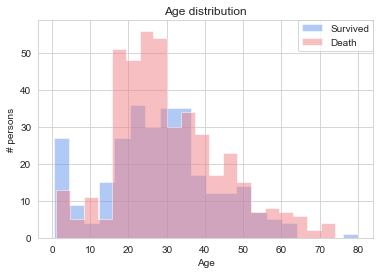

In [10]:
#Perhaps some transparency will help
data1=pd.Series(titanic[titanic.alive=="yes"].age.values).dropna()
plt.hist(data1, bins=20, color="#6495ED",histtype='stepfilled', alpha=0.5, label='Survived');
data2=pd.Series(titanic[titanic.alive=="no"].age.values).dropna()
plt.hist(data2, bins=20, color="#F08084",histtype='stepfilled', alpha=0.5, label='Death');
plt.legend(loc='best', borderaxespad=0.)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("# persons")

plt.show()

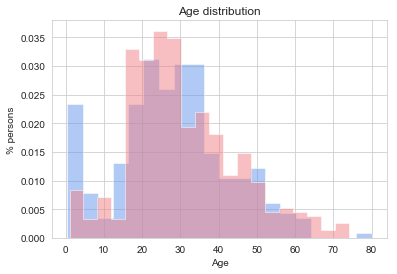

In [19]:
#And what about a normalization per class?
data1=pd.Series(titanic[titanic.alive=="yes"].age.values).dropna()
plt.hist(data1, bins=20, color="#6495ED",histtype='stepfilled',alpha=0.5,density=True);
data2=pd.Series(titanic[titanic.alive=="no"].age.values).dropna()
plt.hist(data2, bins=20, color="#F08084",histtype='stepfilled',alpha=0.5,density=True);
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("% persons")
plt.show()

Let's check how it looks with another dataset

In [20]:
data1 = stats.poisson(2).rvs(90)
data2 = stats.poisson(5).rvs(400)

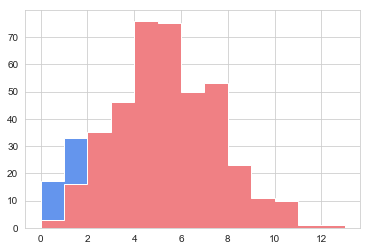

In [21]:
max_data = np.r_[data1, data2].max()
bins = np.linspace(0, max_data, max_data + 1)
plt.hist(data1, bins, color="#6495ED",histtype='stepfilled');
plt.hist(data2, bins, color="#F08084",histtype='stepfilled');

The <b>density argument</b> can also be useful if you want to compare two distributions that do not have the same number of observations. Note also that bins can be a sequence of where each bin starts.

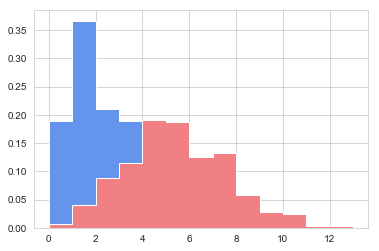

In [22]:
max_data = np.r_[data1, data2].max()
bins = np.linspace(0, max_data, max_data + 1)
plt.hist(data1, bins, density=True, color="#6495ED",histtype='stepfilled');
plt.hist(data2, bins, density=True, color="#F08084",histtype='stepfilled');

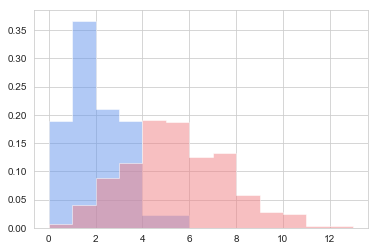

In [23]:
max_data = np.r_[data1, data2].max()
bins = np.linspace(0, max_data, max_data + 1)
plt.hist(data1, bins, density=True, color="#6495ED",alpha=0.5,histtype='stepfilled');
plt.hist(data2, bins, density=True, color="#F08084",alpha=0.5,histtype='stepfilled');


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


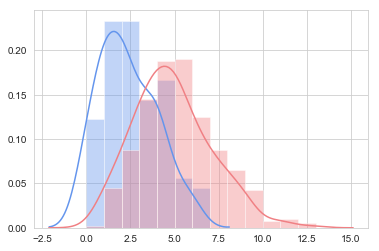

In [18]:
sns.distplot(data1,bins,color="#6495ED",norm_hist=True);
sns.distplot(data2,bins,color="#F08084",norm_hist=True);

https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html

### Data Comparision: <b>BAR CHARTS</b> 


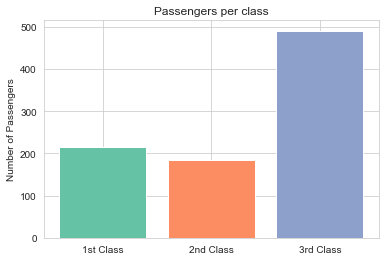

In [24]:
t = titanic.groupby(['pclass']).size()

plt.bar(t.index,t.values,align='center',color=sns.color_palette("Set2", 3))
plt.xticks([1,2,3], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')

plt.title('Passengers per class');
plt.ylabel('Number of Passengers');
plt.xlabel('');

### How to see the number of deads/surviveds per class?

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64
survived    0    1
pclass            
1          80  136
2          97   87
3         372  119


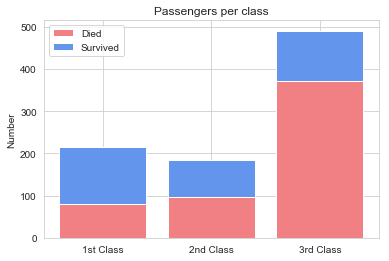

In [17]:
print(titanic.groupby(['pclass', 'survived']).size())
t = titanic.groupby(['pclass', 'survived']).size().unstack()
print(t)
red, blue = '#F08084', '#6495ED'

plt.bar([1,2,3], t[0], color=red, label='Died' ,align='center')
plt.bar([1,2,3], t[1], bottom=t[0], color=blue, label='Survived',align='center')
plt.xticks([1,2,3], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')

plt.ylabel("Number")
plt.xlabel("")
plt.title("Passengers per class")
plt.legend(loc='upper left')
plt.show()

<h5><b>Data Composition</b> <br></h5>
<b>Stacked 100% Column Chart</b>
<br>If I want to visualize if the class dependes with the chances to survive:

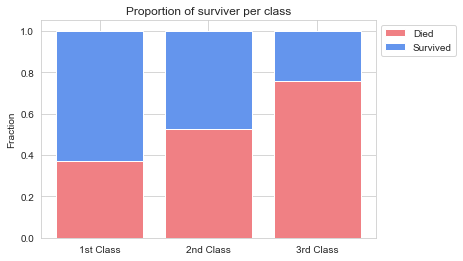

In [18]:
#normalize each row by transposing, normalizing each column, and un-transposing
t = (1. * t.T / t.T.sum()).T

plt.bar([1,2,3], t[0], color=red, label='Died',align='center')
plt.bar([1,2,3], t[1], bottom=t[0], color=blue, label='Survived',align='center')
plt.xticks([1,2,3], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')
plt.ylabel("Fraction")
plt.xlabel("")
plt.title("Proportion of surviver per class")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()

<b>PIE CHARTS</b> 

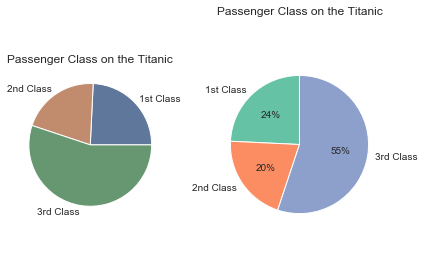

In [19]:
t = titanic.groupby(['pclass']).size()

plt.subplot(121)
plt.pie(t, labels=['1st Class', '2nd Class', '3rd Class'])
plt.title("Passenger Class on the Titanic");
plt.subplot(122,aspect=True)
plt.pie(t, labels=['1st Class', '2nd Class', '3rd Class'], colors=sns.color_palette("Set2", 3),autopct='%i%%',startangle=90)
plt.title("Passenger Class on the Titanic");
plt.axis('equal')
plt.tight_layout()
plt.show()

### Understand flight trips.
#### 1) Flights per year

In [20]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


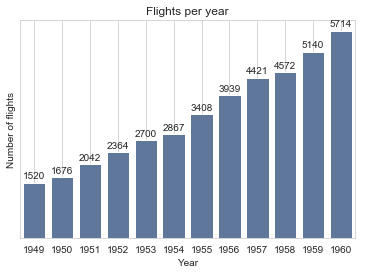

In [21]:
t = flights.groupby(['year']).sum()

plt.bar(t.index,t.passengers.values,align='center')
for x, y in zip(t.index, t.values):
    plt.text(x, y + 60, '%d' % y, ha='center', va='bottom');
    
plt.xlim(1948.5,1960.5)
plt.xticks( np.arange(1949, 1961, 1))
plt.yticks([])
plt.title('Flights per year');

plt.ylabel('Number of flights');
plt.xlabel('Year');

### 2) flights per month using tables

In [25]:
flights_rect = flights.pivot("month", "year", "passengers")
flights_rect = flights_rect.loc[flights.month.iloc[:12]]
flights_rect.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


### 3) flights per month using heatmaps

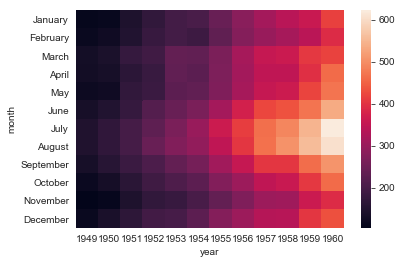

In [26]:
sns.heatmap(flights_rect);

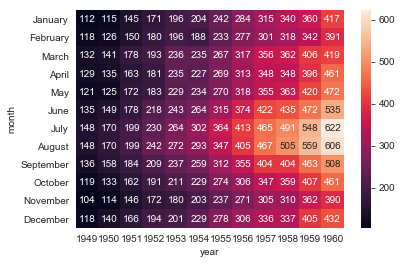

In [27]:
sns.heatmap(flights_rect, annot=True, fmt="d");

<h5>Relationship of Two Variables</h5>
<b>SCATTER PLOT</b>


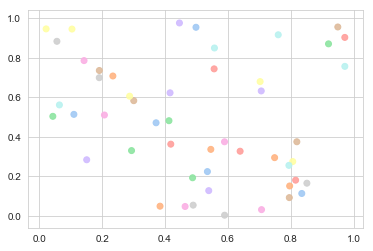

In [28]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
plt.scatter(x, y, c=sns.color_palette("pastel", N), alpha=0.9)
plt.show()

### Relationship of Three Variables:  Bubble Chart

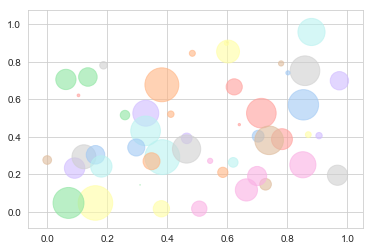

In [26]:
area = np.pi * (20 * np.random.rand(N))**2 # 0 to 20 point radiuses

plt.scatter(x, y, s=area, c=sns.color_palette("pastel", N), alpha=0.6)
plt.show()

## The presence of woman in the US Academia

In [27]:
from pandas import read_csv  
sns.set_style("white")
# Read the data into a pandas DataFrame.  
gender_degree_data = read_csv("http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv")  

In [28]:
gender_degree_data.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [29]:
#How should we display it?? Try to do some vizualization 

<b>A cood Visualiation using simple LINE PLOTS</b>

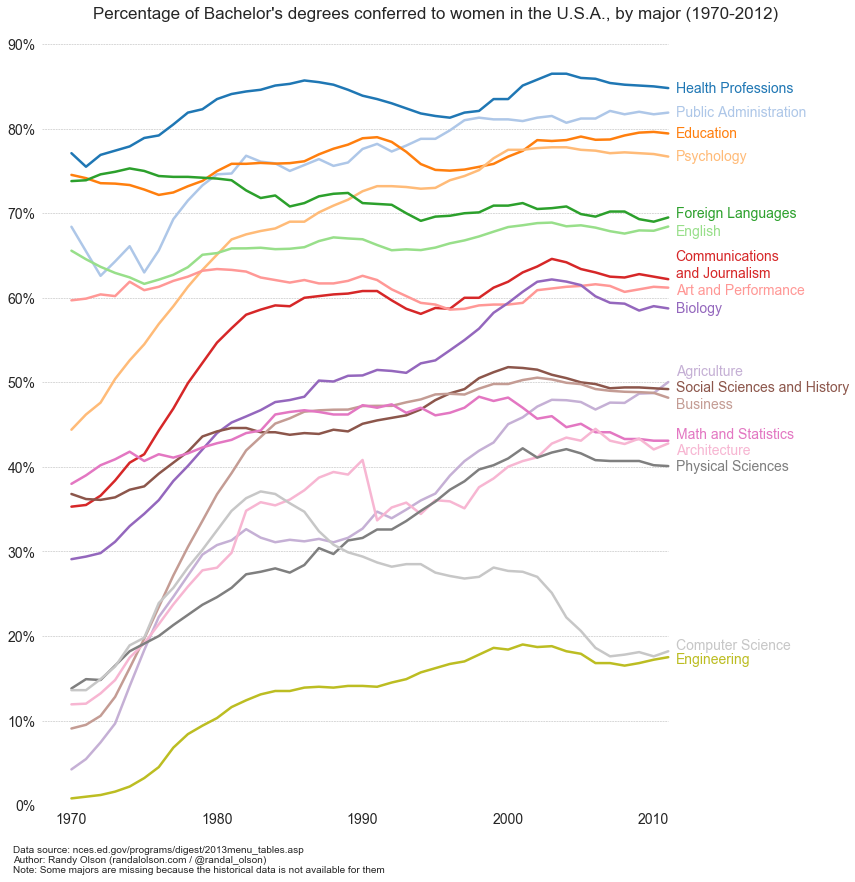

In [41]:
# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
#cm=sns.palplot(sns.color_palette("Set2", 20))
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  
    
#You typically want your plot to be ~1.33x wider than tall. This plot is a rare  
# exception because of the number of lines being plotted on it.  
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(12, 14))  
  
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Limit the range of the plot to only where the data is.  
# Avoid unnecessary whitespace.  
plt.ylim(0, 90)  
plt.xlim(1968, 2014)  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)  
plt.xticks(fontsize=14)  

# Provide tick lines across the plot to help your viewers trace along  
# the axis ticks. Make sure that the lines are light and small so they  
# don't obscure the primary data lines.  
for y in range(10, 91, 10):  
    plt.plot(range(1968, 2012), [y] * len(range(1968, 2012)), "--", lw=0.5, color="black", alpha=0.3)  
  
 #Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
plt.tick_params(axis="both", which="both", bottom=False, top=False,  
                labelbottom=True, left=False, right=False, labelleft=True)  
  
# Now that the plot is prepared, it's time to actually plot the data!  
# Note that I plotted the majors in order of the highest % in the final year.  
majors = ['Health Professions', 'Public Administration', 'Education', 'Psychology',  
          'Foreign Languages', 'English', 'Communications\nand Journalism',  
          'Art and Performance', 'Biology', 'Agriculture',  
          'Social Sciences and History', 'Business', 'Math and Statistics',  
          'Architecture', 'Physical Sciences', 'Computer Science',  
          'Engineering']  
  
for rank, column in enumerate(majors):  
    # Plot each line separately with its own color, using the Tableau 20  
    # color set in order.  
    plt.plot(gender_degree_data.Year.values,  
            gender_degree_data[column.replace("\n", " ")].values,  
            lw=2.5, color=tableau20[rank]);
      
    # Add a text label to the right end of every line. Most of the code below  
    # is adding specific offsets y position because some labels overlapped.  
    y_pos = gender_degree_data[column.replace("\n", " ")].values[-1] - 0.5  
    if column == "Foreign Languages":  
        y_pos += 0.5  
    elif column == "English":  
        y_pos -= 0.5  
    elif column == "Communications\nand Journalism":  
        y_pos += 0.75  
    elif column == "Art and Performance":  
        y_pos -= 0.25  
    elif column == "Agriculture":  
        y_pos += 1.25  
    elif column == "Social Sciences and History":  
        y_pos += 0.25  
    elif column == "Business":  
        y_pos -= 0.75  
    elif column == "Math and Statistics":  
        y_pos += 0.75  
    elif column == "Architecture":  
        y_pos -= 0.75  
    elif column == "Computer Science":  
        y_pos += 0.75  
    elif column == "Engineering":  
        y_pos -= 0.25  
      
    # Again, make sure that all labels are large enough to be easily read  
    # by the viewer.  
    #text(2011.5, y_pos, column, fontsize=14)  
    plt.text(2011.5, y_pos, column, fontsize=14, color=tableau20[rank])
      
# matplotlib's title() call centers the title on the plot, but not the graph,  
# so I used the text() call to customize where the title goes.  
  
# Make the title big enough so it spans the entire plot, but don't make it  
# so big that it requires two lines to show.  
  
# Note that if the title is descriptive enough, it is unnecessary to include  
# axis labels; they are self-evident, in this plot's case.  
plt.text(1995, 93, "Percentage of Bachelor's degrees conferred to women in the U.S.A."  
       ", by major (1970-2012)", fontsize=17, ha="center");
  
# Always include your data source(s) and copyright notice! And for your  
# data sources, tell your viewers exactly where the data came from,  
# preferably with a direct link to the data. Just telling your viewers  
# that you used data from the "U.S. Census Bureau" is completely useless:  
# the U.S. Census Bureau provides all kinds of data, so how are your  
# viewers supposed to know which data set you used?  
plt.text(1966, -8, "Data source: nces.ed.gov/programs/digest/2013menu_tables.asp"  
       "\nAuthor: Randy Olson (randalolson.com / @randal_olson)"  
       "\nNote: Some majors are missing because the historical data "  
       "is not available for them", fontsize=10)

plt.show()
# sample from http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

## Compare features

If we want to print the relation from different features of a dataset we can use the <b>Paired Plot</b> inlcuded in seaborn package

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher (1936) as an example of discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [43]:
iris    = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


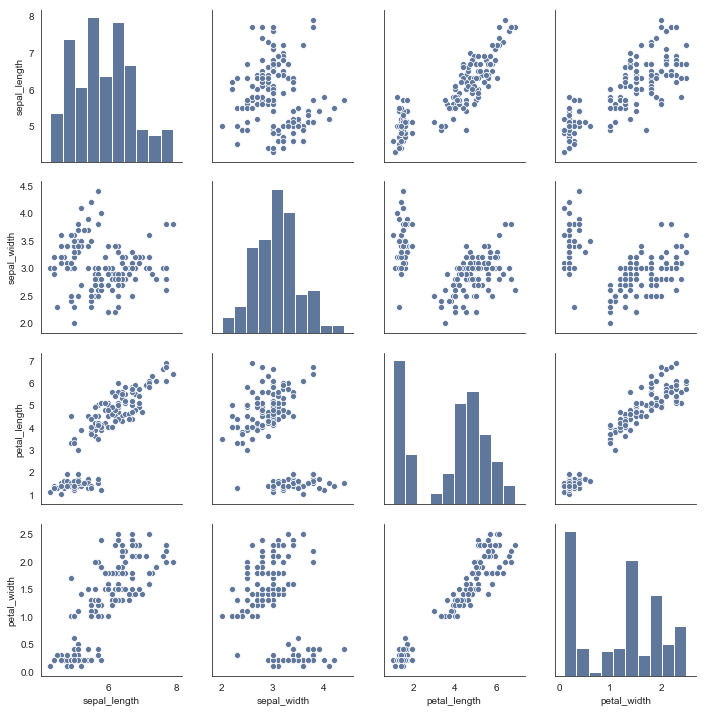

In [45]:
sns.pairplot(iris,  height=2.5);

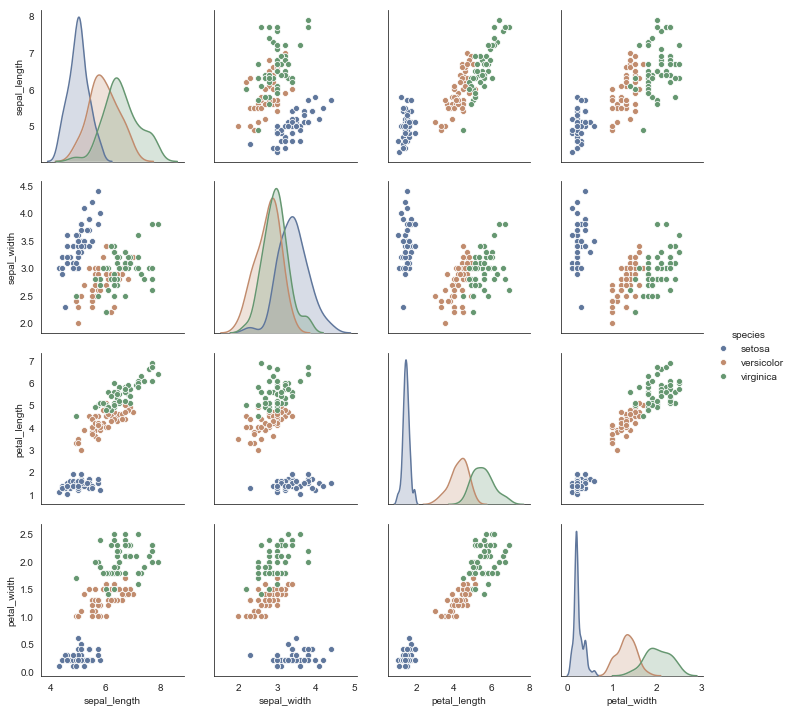

In [48]:
sns.pairplot(iris,hue="species", height=2.5);

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

#### Visualize high dimensional data
* PCA
* MANIFOLDS
* TSNE

<Figure size 432x288 with 0 Axes>

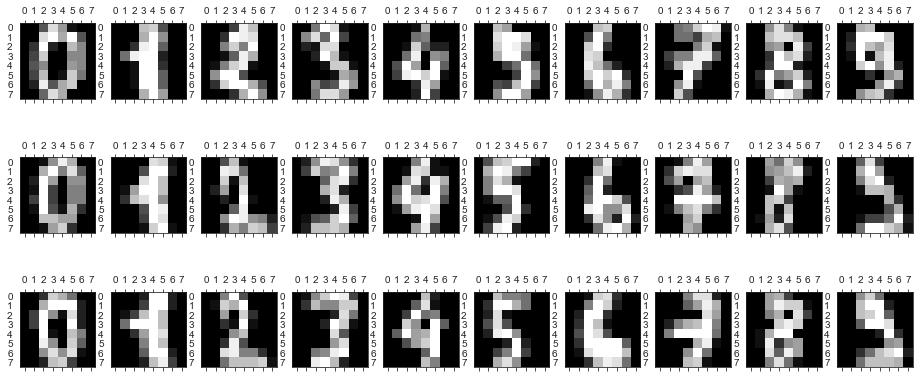

In [108]:
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1 )
    ax.matshow(X[i,:].reshape((8,8)).astype(float))
plt.show()